In [13]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
print(os.listdir("./data/utkface_aligned_cropped/"))

['UTKFace', 'crop_part1']


## Load and Visualize data

In [14]:
files = os.listdir("./data/utkface_aligned_cropped/UTKFace")
y = np.array([[[i.split('_')[0]],[i.split('_')[1]]] for i in files])
# y = np.array([[i.split('_')[1] for i in onlyfiles]]).T
print(y.shape)
print(y[0])

(23708, 2, 1)
[['42']
 ['0']]


In [5]:
X_data =[]
for file in files:
    face = cv2.imread("./data/utkface_aligned_cropped/UTKFace/"+file,cv2.IMREAD_COLOR)
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face =cv2.resize(face, (32,32) )
    X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(23708, 32, 32, 3)

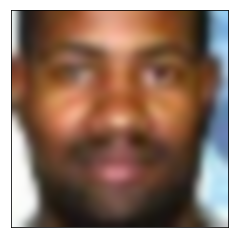

[['27']
 ['0']]


In [6]:
X = np.squeeze(X_data)
imshow(X[1])
print(y[1])

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)
y_train=[y_train[:,1],y_train[:,0]]
y_valid=[y_valid[:,1],y_valid[:,0]]

## Build Model

2021-11-01 18:29:23.818997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-11-01 18:29:23.819178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-01 18:29:23.819221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-01 18:29:23.819256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-01 18:29:23.819292: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

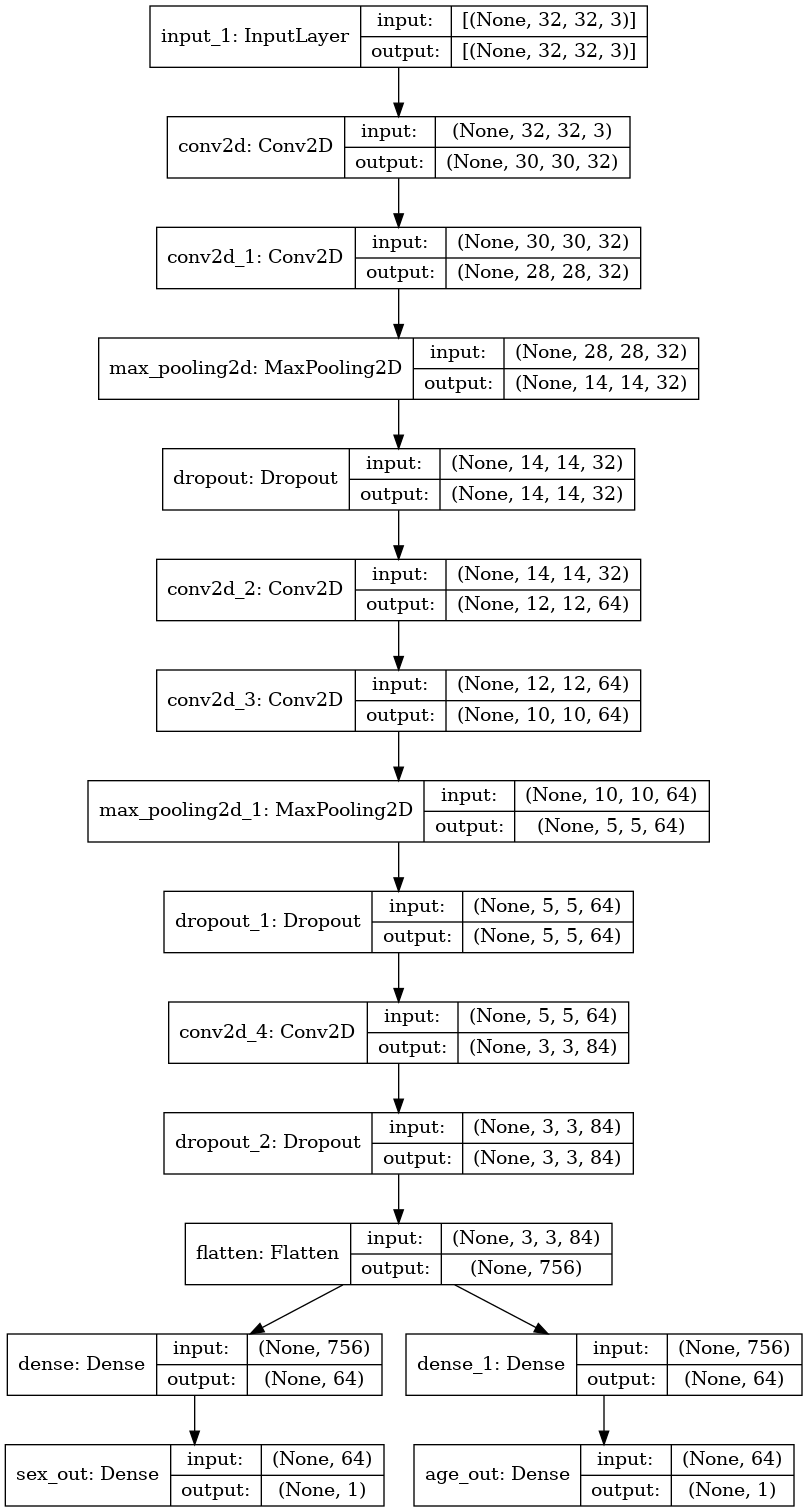

In [2]:

def gen_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    x = inputs
    x = layers.Conv2D(32,3,activation='relu')(x)
    x = layers.Conv2D(32,3,activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(84,3,activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    x1 = layers.Dense(64,activation='relu')(x)
    x2 = layers.Dense(64,activation='relu')(x)
    x1 = layers.Dense(1,activation='sigmoid',name='sex_out')(x1)
    x2 = layers.Dense(1,activation='relu',name='age_out')(x2)
    model = tf.keras.models.Model(inputs=inputs, outputs=[x1, x2])
    model.compile(optimizer='Adam', loss=['binary_crossentropy','mae'])
    tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)  
    return model
model=gen_model()

Image.open('model.png')

## Train Model

In [9]:
import random
random_id=random.random()
model.summary()
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/'+str(random_id))
]
model.fit(X_train, y_train, epochs=200,batch_size=240,validation_data=(X_valid,y_valid),callbacks=callbacks, shuffle=True)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout (D

15884/15884 [==============================] - 1s 71us/sample - loss: 8.5555 - sex_out_loss: 0.4161 - age_out_loss: 8.1394 - val_loss: 8.9015 - val_sex_out_loss: 0.3744 - val_age_out_loss: 8.5271
Epoch 23/200
15884/15884 [==============================] - 1s 68us/sample - loss: 8.5484 - sex_out_loss: 0.4115 - age_out_loss: 8.1370 - val_loss: 9.3168 - val_sex_out_loss: 0.3624 - val_age_out_loss: 8.9544
Epoch 24/200
15884/15884 [==============================] - 1s 69us/sample - loss: 8.4799 - sex_out_loss: 0.4046 - age_out_loss: 8.0753 - val_loss: 10.6214 - val_sex_out_loss: 0.3641 - val_age_out_loss: 10.2573
Epoch 25/200
15884/15884 [==============================] - 1s 79us/sample - loss: 8.2865 - sex_out_loss: 0.4010 - age_out_loss: 7.8855 - val_loss: 10.3150 - val_sex_out_loss: 0.3536 - val_age_out_loss: 9.9614
Epoch 26/200
15884/15884 [==============================] - 1s 69us/sample - loss: 8.2774 - sex_out_loss: 0.3972 - age_out_loss: 7.8802 - val_loss: 8.9000 - val_sex_out_loss:

15884/15884 [==============================] - 1s 67us/sample - loss: 6.8448 - sex_out_loss: 0.3479 - age_out_loss: 6.4970 - val_loss: 7.5870 - val_sex_out_loss: 0.3070 - val_age_out_loss: 7.2800
Epoch 62/200
15884/15884 [==============================] - 1s 67us/sample - loss: 6.8080 - sex_out_loss: 0.3516 - age_out_loss: 6.4564 - val_loss: 7.5578 - val_sex_out_loss: 0.3153 - val_age_out_loss: 7.2425
Epoch 63/200
15884/15884 [==============================] - 1s 68us/sample - loss: 6.7323 - sex_out_loss: 0.3468 - age_out_loss: 6.3855 - val_loss: 7.0846 - val_sex_out_loss: 0.3132 - val_age_out_loss: 6.7714
Epoch 64/200
15884/15884 [==============================] - 1s 68us/sample - loss: 6.7692 - sex_out_loss: 0.3429 - age_out_loss: 6.4263 - val_loss: 7.6551 - val_sex_out_loss: 0.3079 - val_age_out_loss: 7.3473
Epoch 65/200
15884/15884 [==============================] - 1s 67us/sample - loss: 6.7172 - sex_out_loss: 0.3435 - age_out_loss: 6.3737 - val_loss: 7.2490 - val_sex_out_loss: 0.

15884/15884 [==============================] - 1s 71us/sample - loss: 6.2696 - sex_out_loss: 0.3231 - age_out_loss: 5.9465 - val_loss: 7.0993 - val_sex_out_loss: 0.2969 - val_age_out_loss: 6.8024
Epoch 101/200
15884/15884 [==============================] - 1s 70us/sample - loss: 6.1783 - sex_out_loss: 0.3217 - age_out_loss: 5.8567 - val_loss: 6.6926 - val_sex_out_loss: 0.3003 - val_age_out_loss: 6.3923
Epoch 102/200
15884/15884 [==============================] - 1s 71us/sample - loss: 6.2913 - sex_out_loss: 0.3277 - age_out_loss: 5.9636 - val_loss: 6.7772 - val_sex_out_loss: 0.2996 - val_age_out_loss: 6.4776
Epoch 103/200
15884/15884 [==============================] - 1s 70us/sample - loss: 6.1569 - sex_out_loss: 0.3190 - age_out_loss: 5.8380 - val_loss: 6.6913 - val_sex_out_loss: 0.2944 - val_age_out_loss: 6.3968
Epoch 104/200
15884/15884 [==============================] - 1s 72us/sample - loss: 6.2198 - sex_out_loss: 0.3263 - age_out_loss: 5.8935 - val_loss: 7.5988 - val_sex_out_loss

15884/15884 [==============================] - 1s 68us/sample - loss: 5.8364 - sex_out_loss: 0.3047 - age_out_loss: 5.5317 - val_loss: 7.0722 - val_sex_out_loss: 0.2827 - val_age_out_loss: 6.7895
Epoch 140/200
15884/15884 [==============================] - 1s 68us/sample - loss: 5.8005 - sex_out_loss: 0.3057 - age_out_loss: 5.4948 - val_loss: 6.5007 - val_sex_out_loss: 0.2851 - val_age_out_loss: 6.2156
Epoch 141/200
15884/15884 [==============================] - 1s 69us/sample - loss: 5.8974 - sex_out_loss: 0.3110 - age_out_loss: 5.5863 - val_loss: 6.8533 - val_sex_out_loss: 0.2922 - val_age_out_loss: 6.5612
Epoch 142/200
15884/15884 [==============================] - 1s 74us/sample - loss: 5.8565 - sex_out_loss: 0.3116 - age_out_loss: 5.5449 - val_loss: 6.5035 - val_sex_out_loss: 0.2869 - val_age_out_loss: 6.2166
Epoch 143/200
15884/15884 [==============================] - 1s 71us/sample - loss: 5.7221 - sex_out_loss: 0.3093 - age_out_loss: 5.4128 - val_loss: 6.9542 - val_sex_out_loss

15884/15884 [==============================] - 1s 68us/sample - loss: 5.6133 - sex_out_loss: 0.2967 - age_out_loss: 5.3166 - val_loss: 6.7804 - val_sex_out_loss: 0.2840 - val_age_out_loss: 6.4964
Epoch 179/200
15884/15884 [==============================] - 1s 69us/sample - loss: 5.6865 - sex_out_loss: 0.3032 - age_out_loss: 5.3833 - val_loss: 6.5397 - val_sex_out_loss: 0.2832 - val_age_out_loss: 6.2565
Epoch 180/200
15884/15884 [==============================] - 1s 68us/sample - loss: 5.6064 - sex_out_loss: 0.3039 - age_out_loss: 5.3025 - val_loss: 6.5596 - val_sex_out_loss: 0.2845 - val_age_out_loss: 6.2751
Epoch 181/200
15884/15884 [==============================] - 1s 86us/sample - loss: 5.5104 - sex_out_loss: 0.3043 - age_out_loss: 5.2061 - val_loss: 6.6120 - val_sex_out_loss: 0.2760 - val_age_out_loss: 6.3360
Epoch 182/200
15884/15884 [==============================] - 1s 68us/sample - loss: 5.6483 - sex_out_loss: 0.3008 - age_out_loss: 5.3475 - val_loss: 6.5117 - val_sex_out_loss

In [ ]:
model_json = model.to_json()
with open('age_gender_model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('age_gender.h5')

## Evaluate Model

In [ ]:
model.evaluate(X_valid,y_valid)

In [3]:
model.load_weights(os.path.join('saved_models', 'gender_model',"age_gender.h5"))

In [5]:
face = cv2.imread("./data/utkface_aligned_cropped/brajesh.png",cv2.IMREAD_COLOR)
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
face =cv2.resize(face, (32,32) )

In [8]:
face = np.expand_dims(face, axis=0)

In [9]:
face.shape

(1, 32, 32, 3)

In [10]:
model.predict(face)

[array([[0.48005745]], dtype=float32), array([[21.94534]], dtype=float32)]

In [ ]:
p_id=2
imshow(X_valid[p_id])
print(y_valid[0][p_id],y_valid[1][p_id])
print(model.predict([[X_valid[p_id]]]))